In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_apps = pd.read_csv('apps.csv')

In [5]:
print(data_apps.head())


   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [6]:
data_apps['Reviews'] = pd.to_numeric(data_apps['Reviews'], errors='coerce')
data_apps['Size'] = pd.to_numeric(data_apps['Size'], errors='coerce')
data_apps['Installs'] = data_apps['Installs'].str.replace('+', '').str.replace(',', '')
data_apps['Installs'] = pd.to_numeric(data_apps['Installs'], errors='coerce')


C:\Users\gotta\AppData\Local\Temp\ipykernel_87192\339615809.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_apps['Installs'] = data_apps['Installs'].str.replace('+', '').str.replace(',', '')


In [7]:
data_apps['Price'] = data_apps['Price'].str.replace('$', '').astype(float)


C:\Users\gotta\AppData\Local\Temp\ipykernel_87192\3272541435.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_apps['Price'] = data_apps['Price'].str.replace('$', '').astype(float)


In [8]:
print(data_apps.isnull().sum())


Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [9]:
data_apps['Rating'].fillna(data_apps['Rating'].median(), inplace=True)
data_apps['Type'].fillna(data_apps['Type'].mode()[0], inplace=True)
data_apps['Current Ver'].fillna('Varies with device', inplace=True)
data_apps['Android Ver'].fillna('Varies with device', inplace=True)


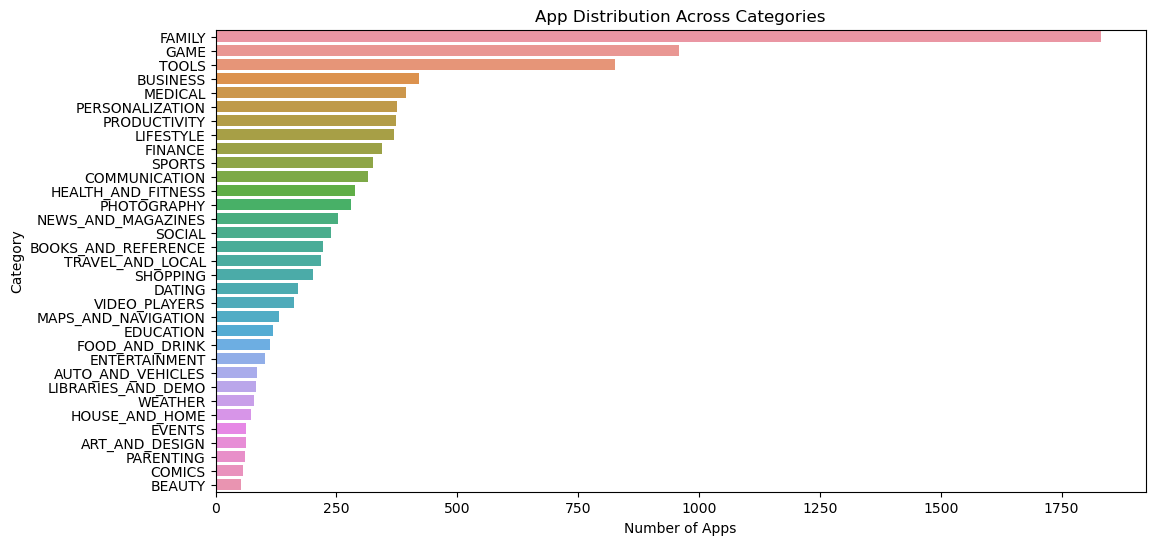

In [10]:

plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=data_apps, order=data_apps['Category'].value_counts().index)
plt.title('App Distribution Across Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


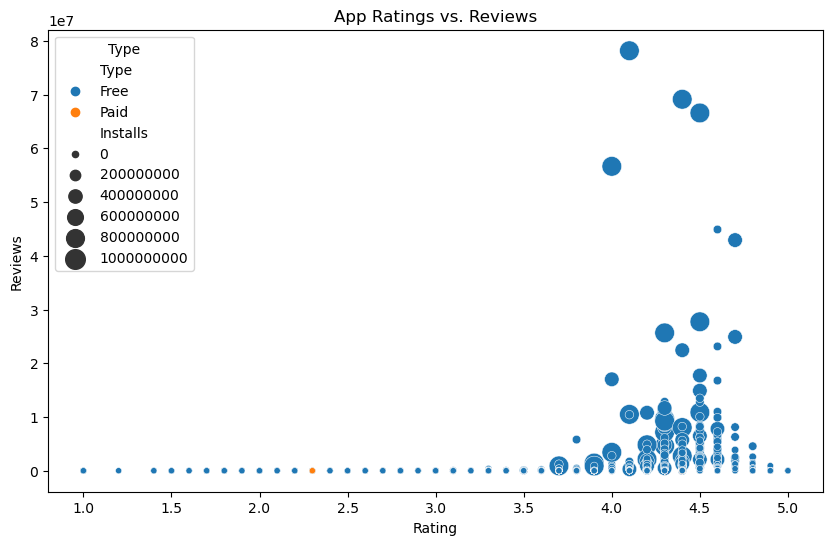

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Reviews', data=data_apps, hue='Type', size='Installs', sizes=(20, 200))
plt.title('App Ratings vs. Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.legend(title='Type')
plt.show()


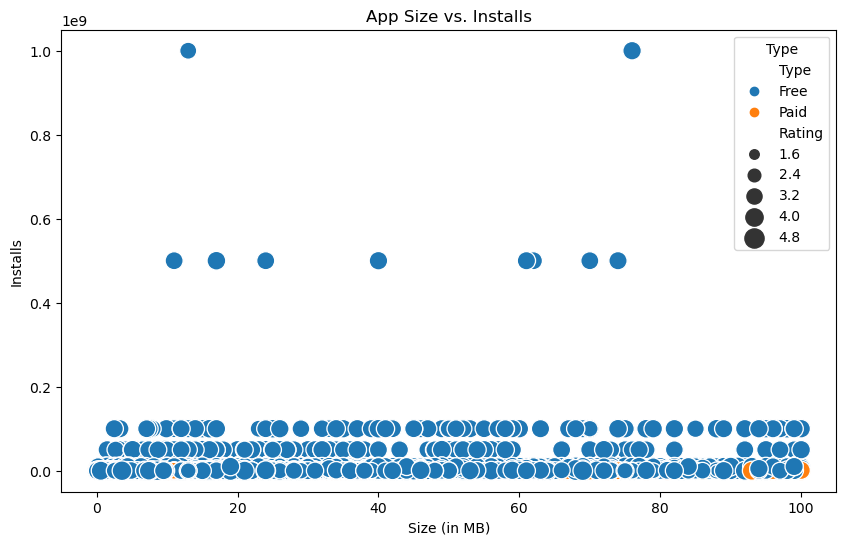

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Installs', data=data_apps, hue='Type', size='Rating', sizes=(20, 200))
plt.title('App Size vs. Installs')
plt.xlabel('Size (in MB)')
plt.ylabel('Installs')
plt.legend(title='Type')
plt.show()


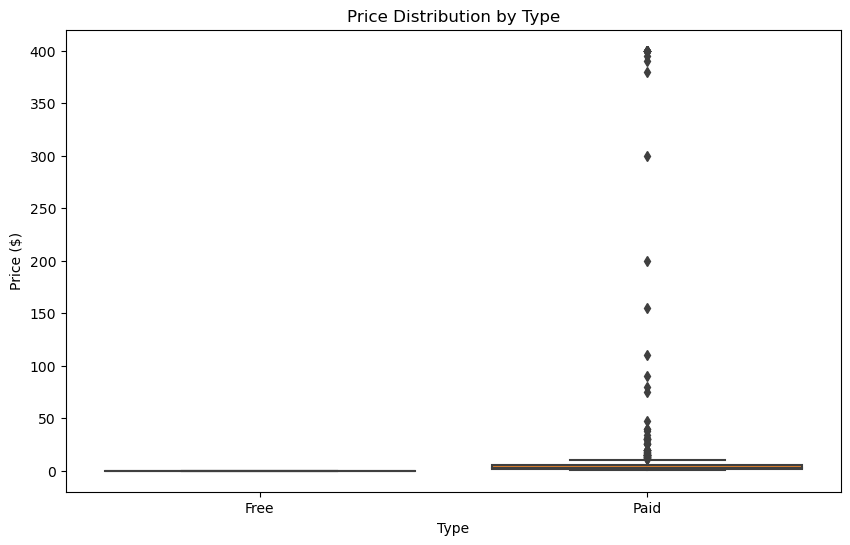

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=data_apps)
plt.title('Price Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Price ($)')
plt.show()


In [15]:
review_data_user = pd.read_csv('user_reviews.csv')

In [16]:
print(review_data_user.head())


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


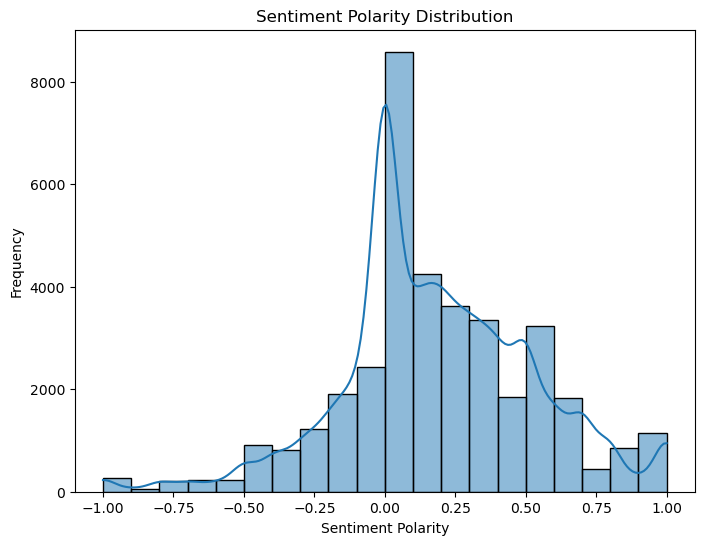

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(review_data_user['Sentiment_Polarity'], bins=20, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


C:\Users\gotta\AppData\Local\Temp\ipykernel_87192\1965370415.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_apps.corr(), annot=True, cmap='coolwarm', fmt=".2f")


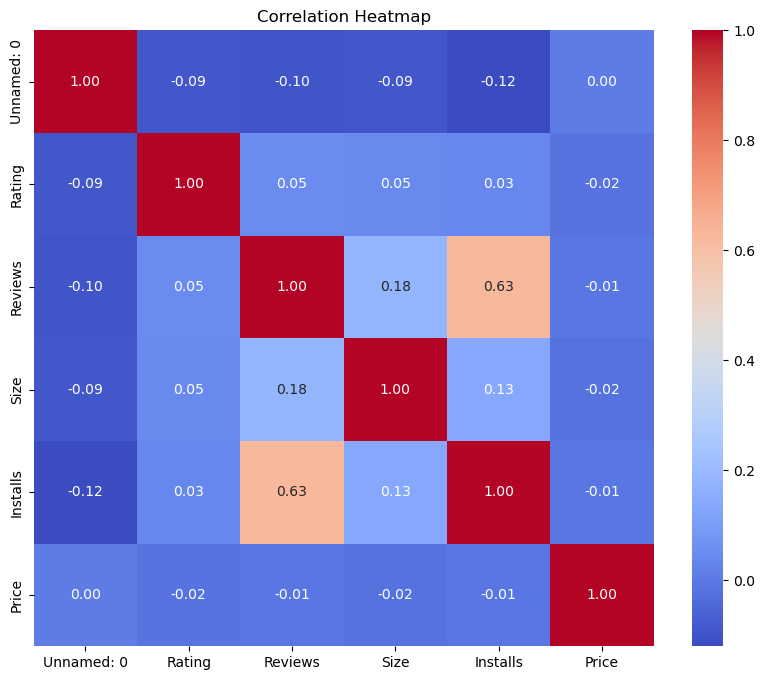

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_apps.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
